# Project 2: Simulational annealing

Task: Optimize the configuration of $N$ charges in order to minimize the energy of the system defined as $E=\sum_{i,j=0}^N \frac{1}{r_{ij}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Charges:
  def __init__(self, NUMBER_OF_CHARGES):
    self.charges = np.random.rand(2, NUMBER_OF_CHARGES)
    self.charges *= 2
    self.charges -= 1
    for i in range(NUMBER_OF_CHARGES):
      while(True): 
        if self.charges[0, i] ** 2 +self.charges[1, i] ** 2 >1:
          self.charges[0, i] = np.random.random() * 2 -1
          self.charges[1, i] = np.random.random() * 2 -1
        else:
          break
    self.NUMBER_OF_CHARGES = NUMBER_OF_CHARGES

  def __str__(self):
    return f'Number of charges: {self.NUMBER_OF_CHARGES}'

In [44]:
class Annealer:
  def __init__(self, NUMBER_OF_CHARGES, initial_temperature, final_temperature,
               cooling_ratio, monte_carlo_steps, change_epsilon):
    self.NUMBER_OF_CHARGES = NUMBER_OF_CHARGES
    self.charges = Charges(NUMBER_OF_CHARGES)
    self.initial_temperature = initial_temperature
    self.final_temperature = final_temperature
    self.cooling_ratio = cooling_ratio
    self.monte_carlo_steps = monte_carlo_steps
    self.config_gen = Configuration_Generator(self.charges, initial_temperature, change_epsilon)
    self.energies = []
  
  def freeze(self):
    current_temperature = self.initial_temperature
    while current_temperature > self.final_temperature:
      self.config_gen.set_temperature(current_temperature)
      for i in range(self.monte_carlo_steps):
        self.config_gen.generate_new_config()
      current_temperature *= self.cooling_ratio
      temp_energy = self.config_gen.compute_energy()
      self.energies.append(temp_energy)
#       print(current_temperature)
#       print(temp_energy)
#       self.plot_charges()

  def plot_charges(self):
      plt.scatter(self.charges.charges[0,:], self.charges.charges[1,:], c='r')
      x = np.cos(np.arange(0,1.01,0.01) * 2 * np.pi)
      y = np.sin(np.arange(0,1.01,0.01) * 2 * np.pi)
      plt.plot(x, y)
      plt.axis('equal')
      plt.show()
      
  def save_plot(self, file_name):
      plt.clf()
      plt.scatter(self.charges.charges[0,:], self.charges.charges[1,:], c='r', label="Charges", s=750)
      x = np.cos(np.arange(0,1.01,0.01) * 2 * np.pi)
      y = np.sin(np.arange(0,1.01,0.01) * 2 * np.pi)
      plt.plot(x, y, c='xkcd:sky blue', linewidth=10, label="Boundary")
      plt.axis('equal')
      plt.legend(fontsize='40')
      plt.title(f'Optimized configuration of {self.charges.charges.shape[1]} charges\n', fontsize='60')
      plt.gcf().set_size_inches(30, 22.5)
      plt.tick_params(axis='both', which='major', labelsize=35)
      plt.savefig(f'Results/{file_name}.pdf')
      plt.show()
      
  def save_energies(self, file_name):
      plt.clf()
      plt.plot(range(len(self.energies)), self.energies, c='xkcd:sky blue', linewidth=10, label="Energy")
      plt.legend(fontsize='40')
      plt.xlabel('\nTime', fontsize='50')
      plt.ylabel('Energy\n', fontsize='50')
      plt.title('Evolution of the system\'s energy \n', fontsize='60')
      plt.gcf().set_size_inches(30, 22.5)
      plt.tick_params(axis='both', which='major', labelsize=35)
      plt.savefig(f'Results/{file_name}.pdf')
      plt.show()
    
  def __str__(self):
    return f'Energy of the system: {self.config_gen.compute_energy()}'

In [4]:
class Configuration_Generator:
  def __init__(self, charges, temperature, change_epsilon):
    self.charges = charges
    self.temperature = temperature
    self.change_epsilon = change_epsilon
    
  def set_temperature(self, temperature):
    self.temperature = temperature
    
  def interaction_energy(self, id_a, id_b):
    temp = self.charges.charges[:,id_a] - self.charges.charges[:,id_b]
    temp = np.power(temp, 2).sum()
    temp = np.power(temp, -0.5)
    return temp
  
  def compute_energy(self):
    total_energy = 0.0
    for charge_a_id in range(self.charges.NUMBER_OF_CHARGES):
      for charge_b_id in range(charge_a_id + 1, self.charges.NUMBER_OF_CHARGES):
        total_energy += self.interaction_energy(charge_a_id, charge_b_id)
    return total_energy
  
  def generate_new_config(self):
    for i in range(self.charges.NUMBER_OF_CHARGES):
      charge_id = np.random.randint(self.charges.NUMBER_OF_CHARGES)      
      old = np.copy(self.charges.charges[:, charge_id])
      old_energy = self.compute_energy()
      
      # Move it inside the boundaries
      while True:
        temp_coords = self.charges.charges[:, charge_id] + self.change_epsilon * (2 * np.random.random(size=(2)) -1)
        if np.power(temp_coords, 2).sum() <= 1:
          self.charges.charges[:, charge_id] = temp_coords
          break
          

      # Compute energy difference
      new_energy = self.compute_energy()
      energy_dif = new_energy - old_energy
      
      # Accept if it is lower than 0, otherwise accept with probability exp(-E/T), else leave unchanged
      if energy_dif <= 0 or np.random.random() < np.exp(-energy_dif / self.temperature):
        pass
      else:
        self.charges.charges[:, charge_id] = old 

Energy of the system: 1077.2909184791333


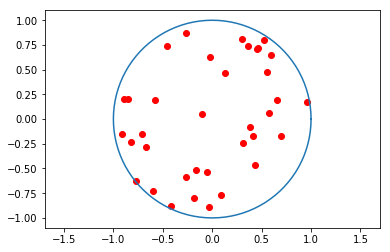

In [37]:
an = Annealer(36, 1, 10**-5, 0.95, 50, 0.01)
print(an)
an.plot_charges()

In [38]:
an.freeze()

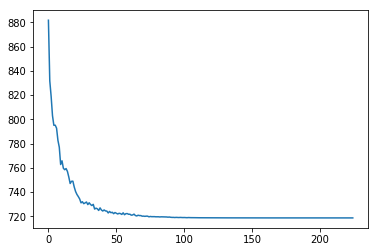

In [39]:
plt.plot(range(len(an.energies)), an.energies)
plt.show()

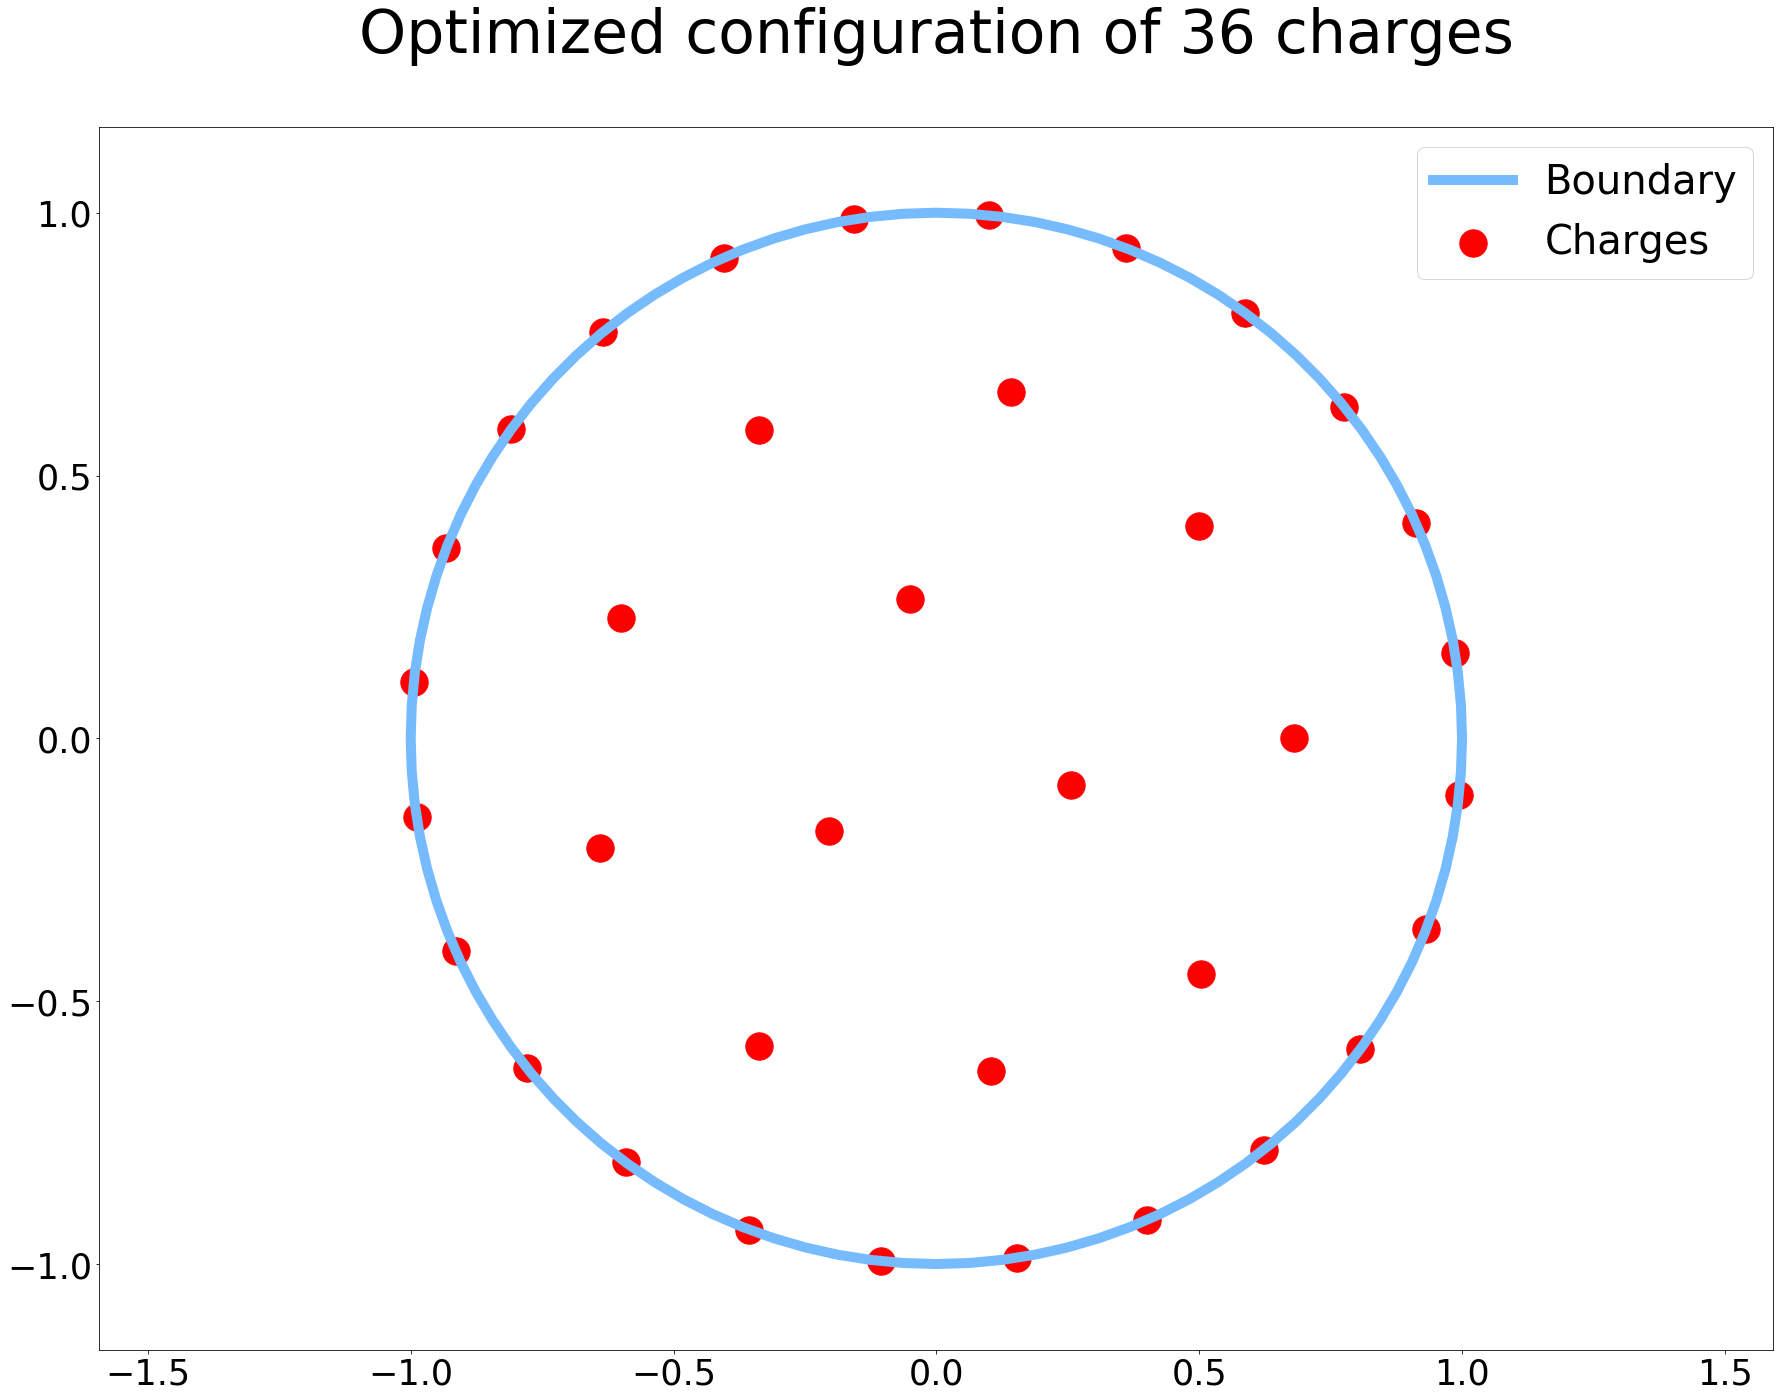

In [40]:
an.save_plot('CH36C95MCS50')

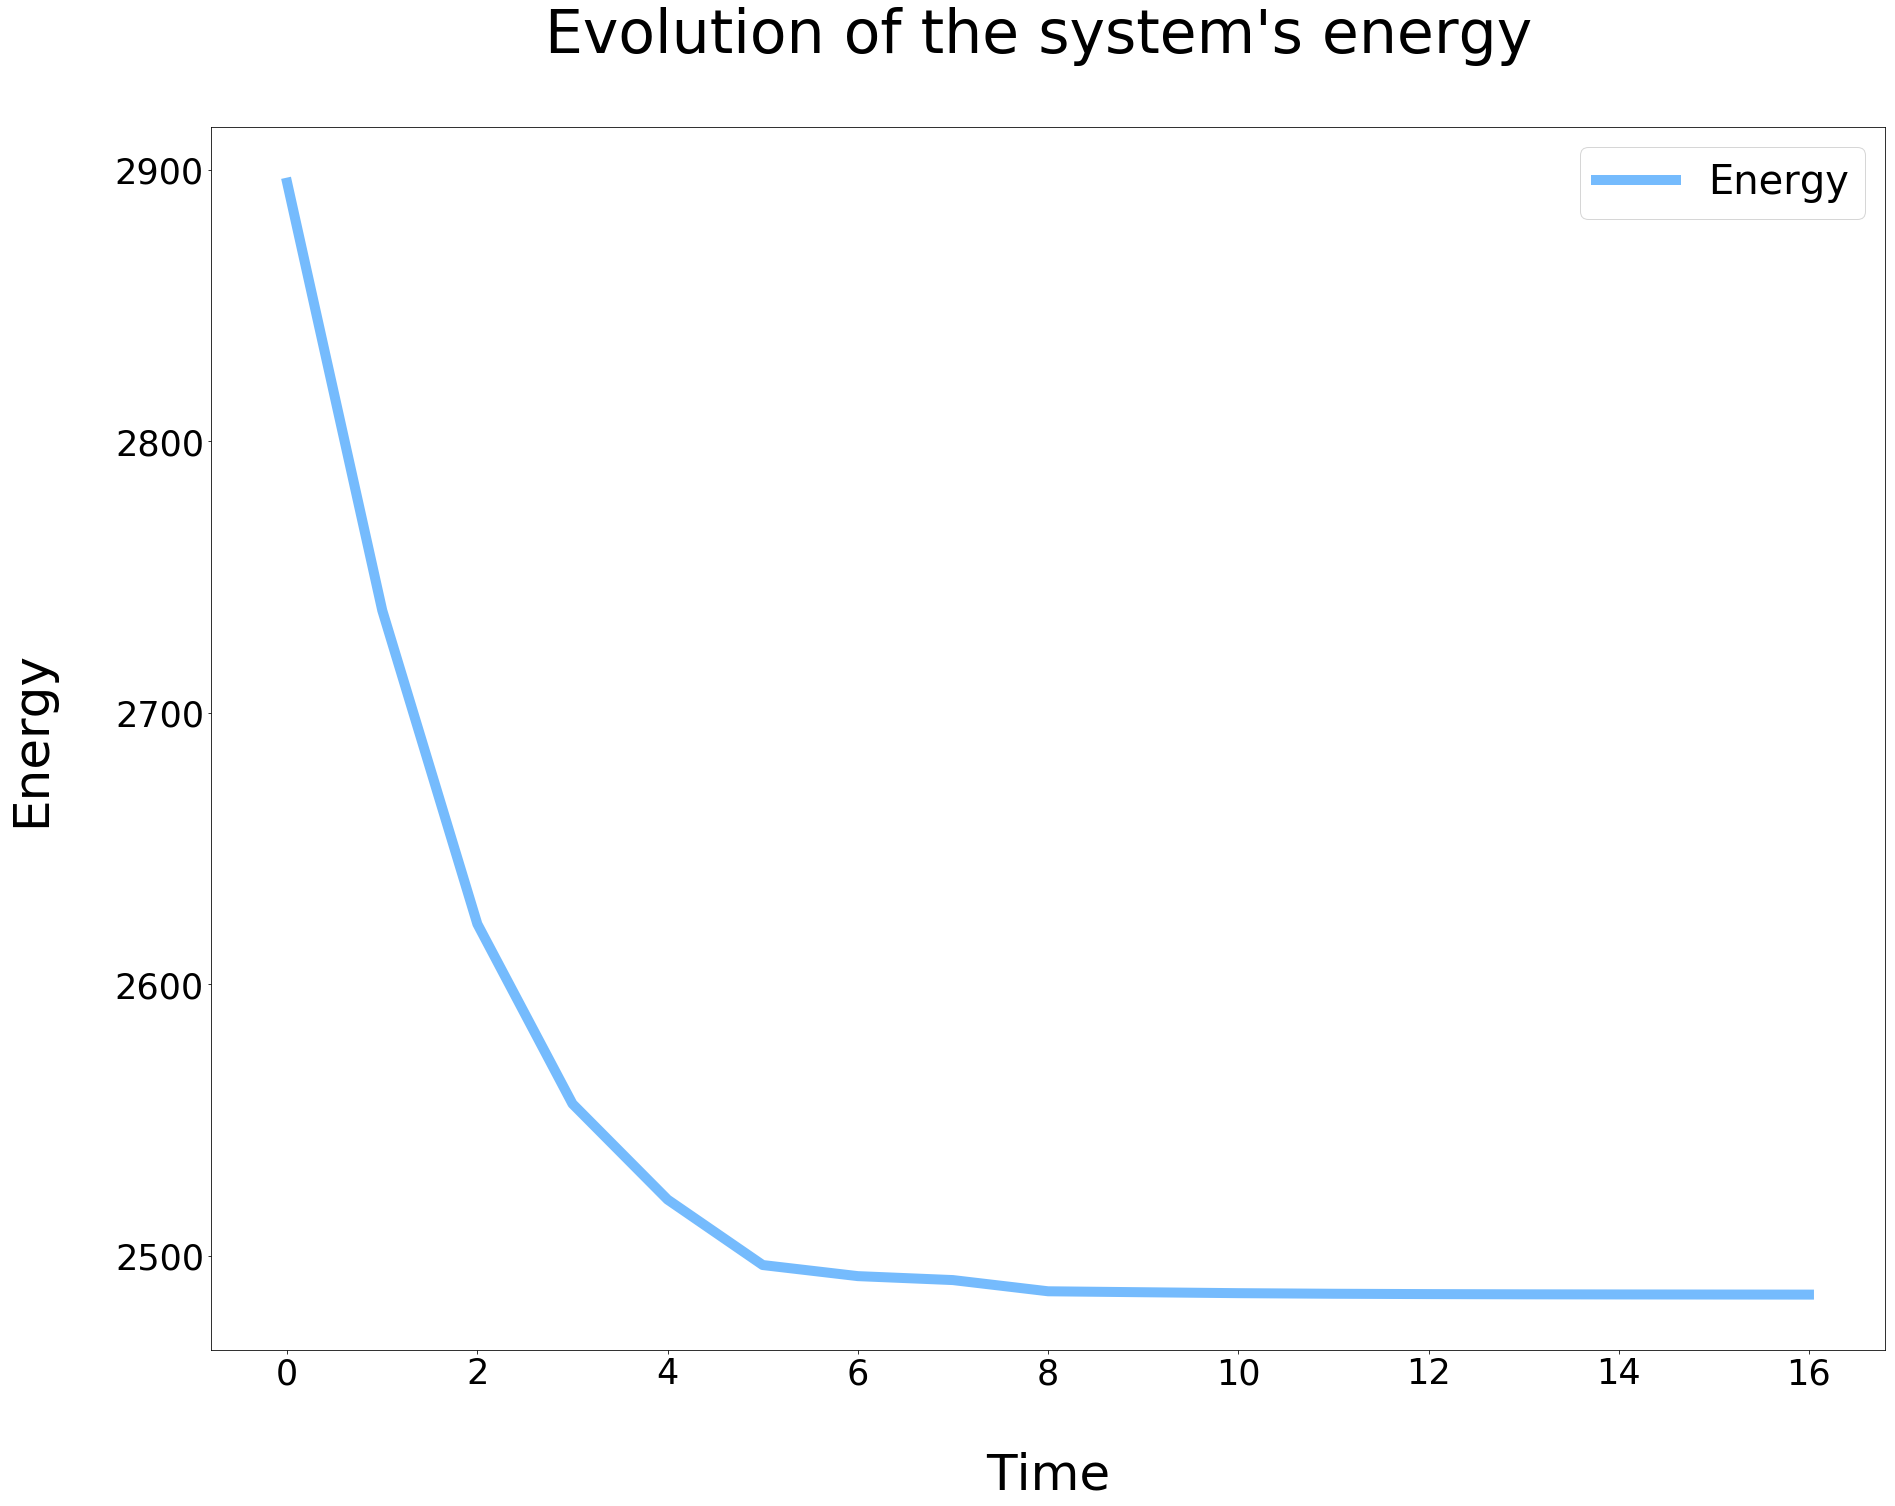

In [45]:
def save_energies(file_name):
  plt.clf()
  plt.plot(range(len(an2.energies)), an2.energies, c='xkcd:sky blue', linewidth=10, label="Energy")
  plt.legend(fontsize='40')
  plt.xlabel('\nTime', fontsize='50')
  plt.ylabel('Energy\n', fontsize='50')
  plt.title('Evolution of the system\'s energy \n', fontsize='60')
  plt.gcf().set_size_inches(30, 22.5)
  plt.tick_params(axis='both', which='major', labelsize=35)
  plt.savefig(f'Results/{file_name}.pdf')
  plt.show()
save_energies('energy_CH64C5MCS500')

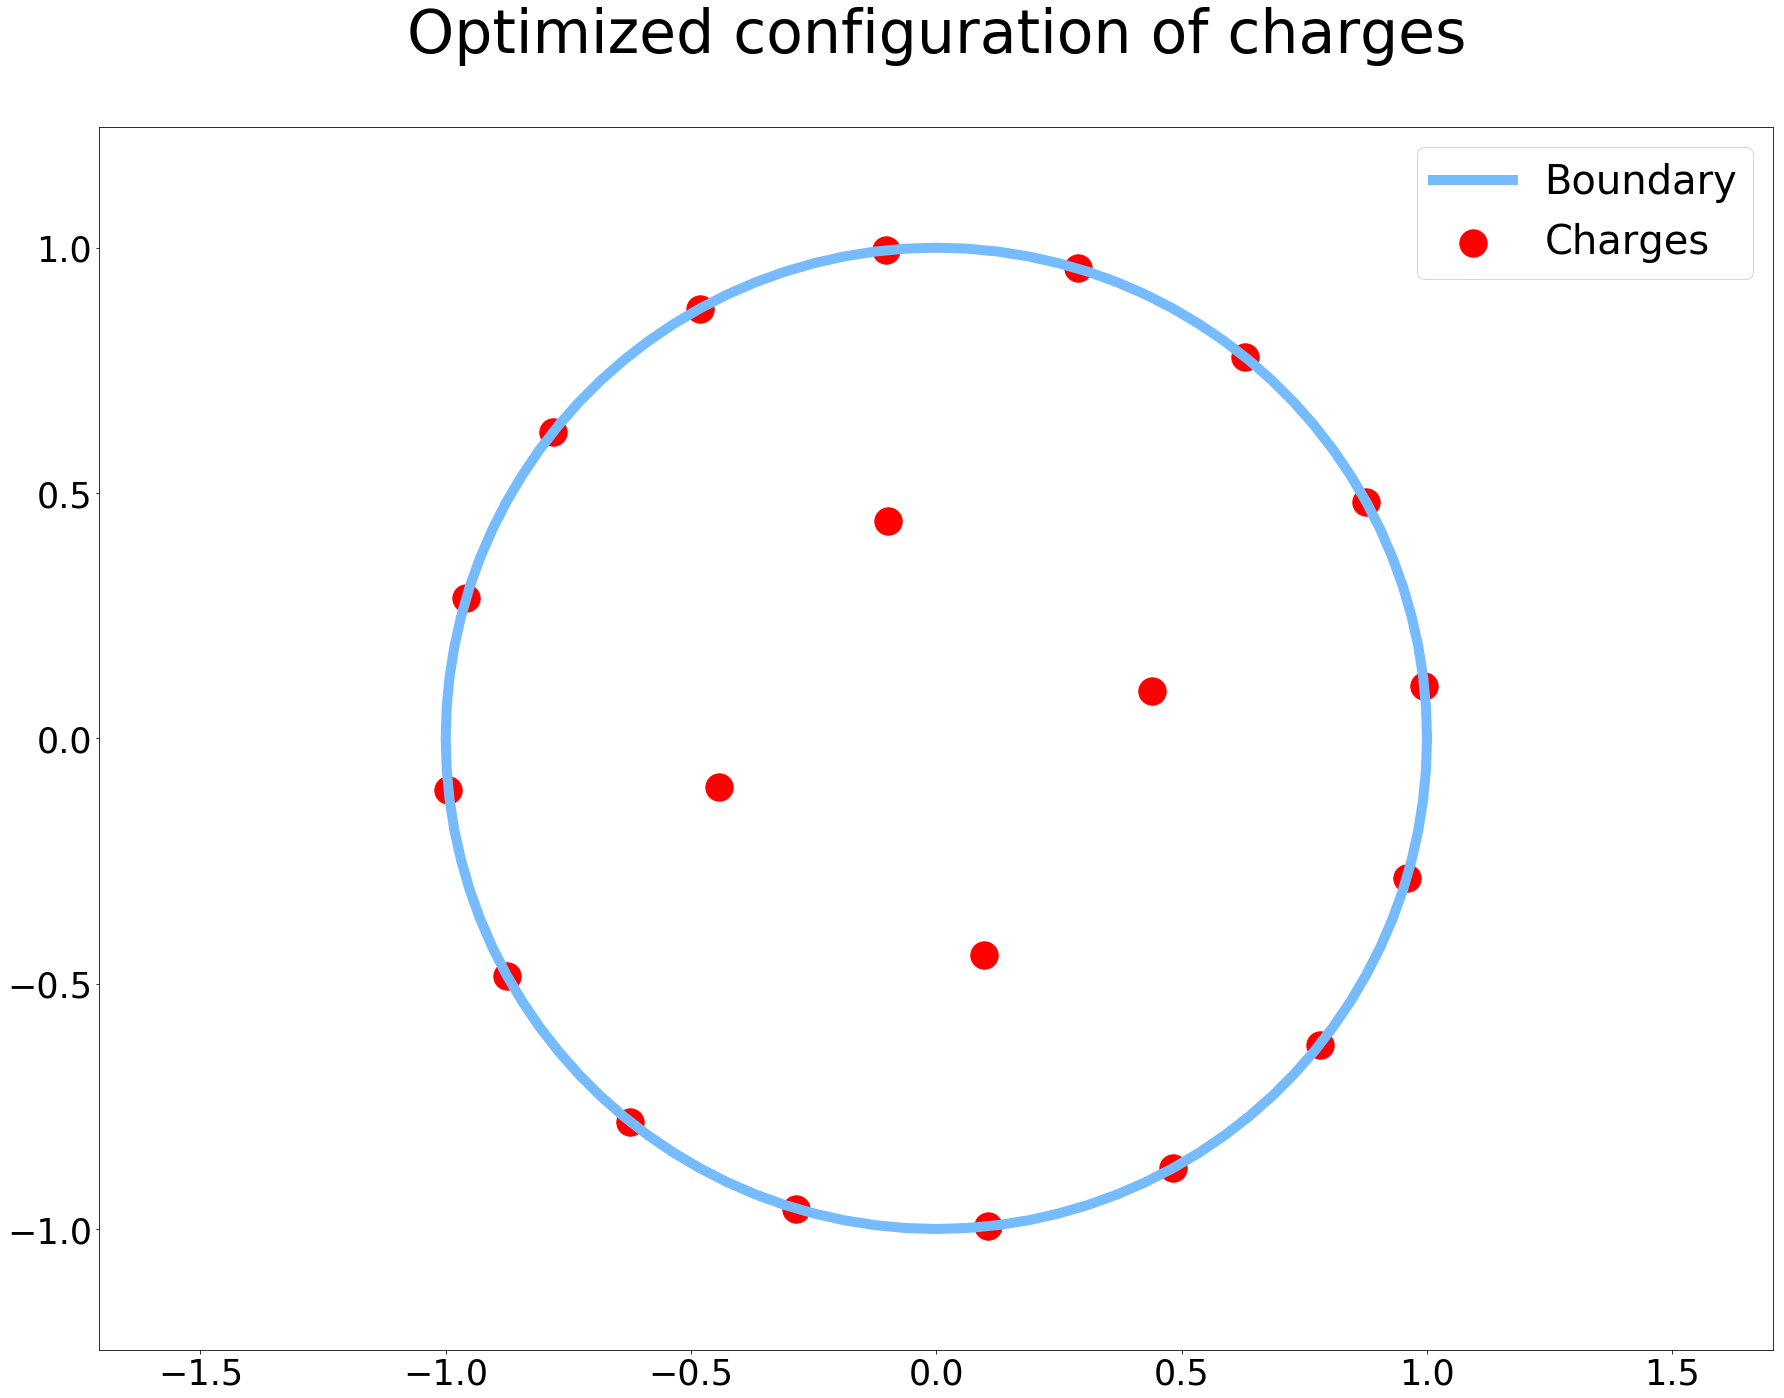

In [27]:
save_plot('CH20C95MCS50')

In [31]:
an.charges.charges.shape[1]

20

Energy of the system: 3372.0086548161803


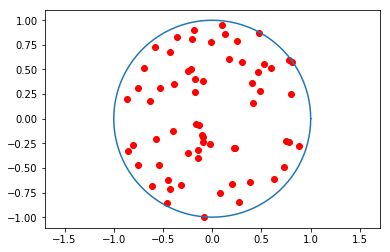

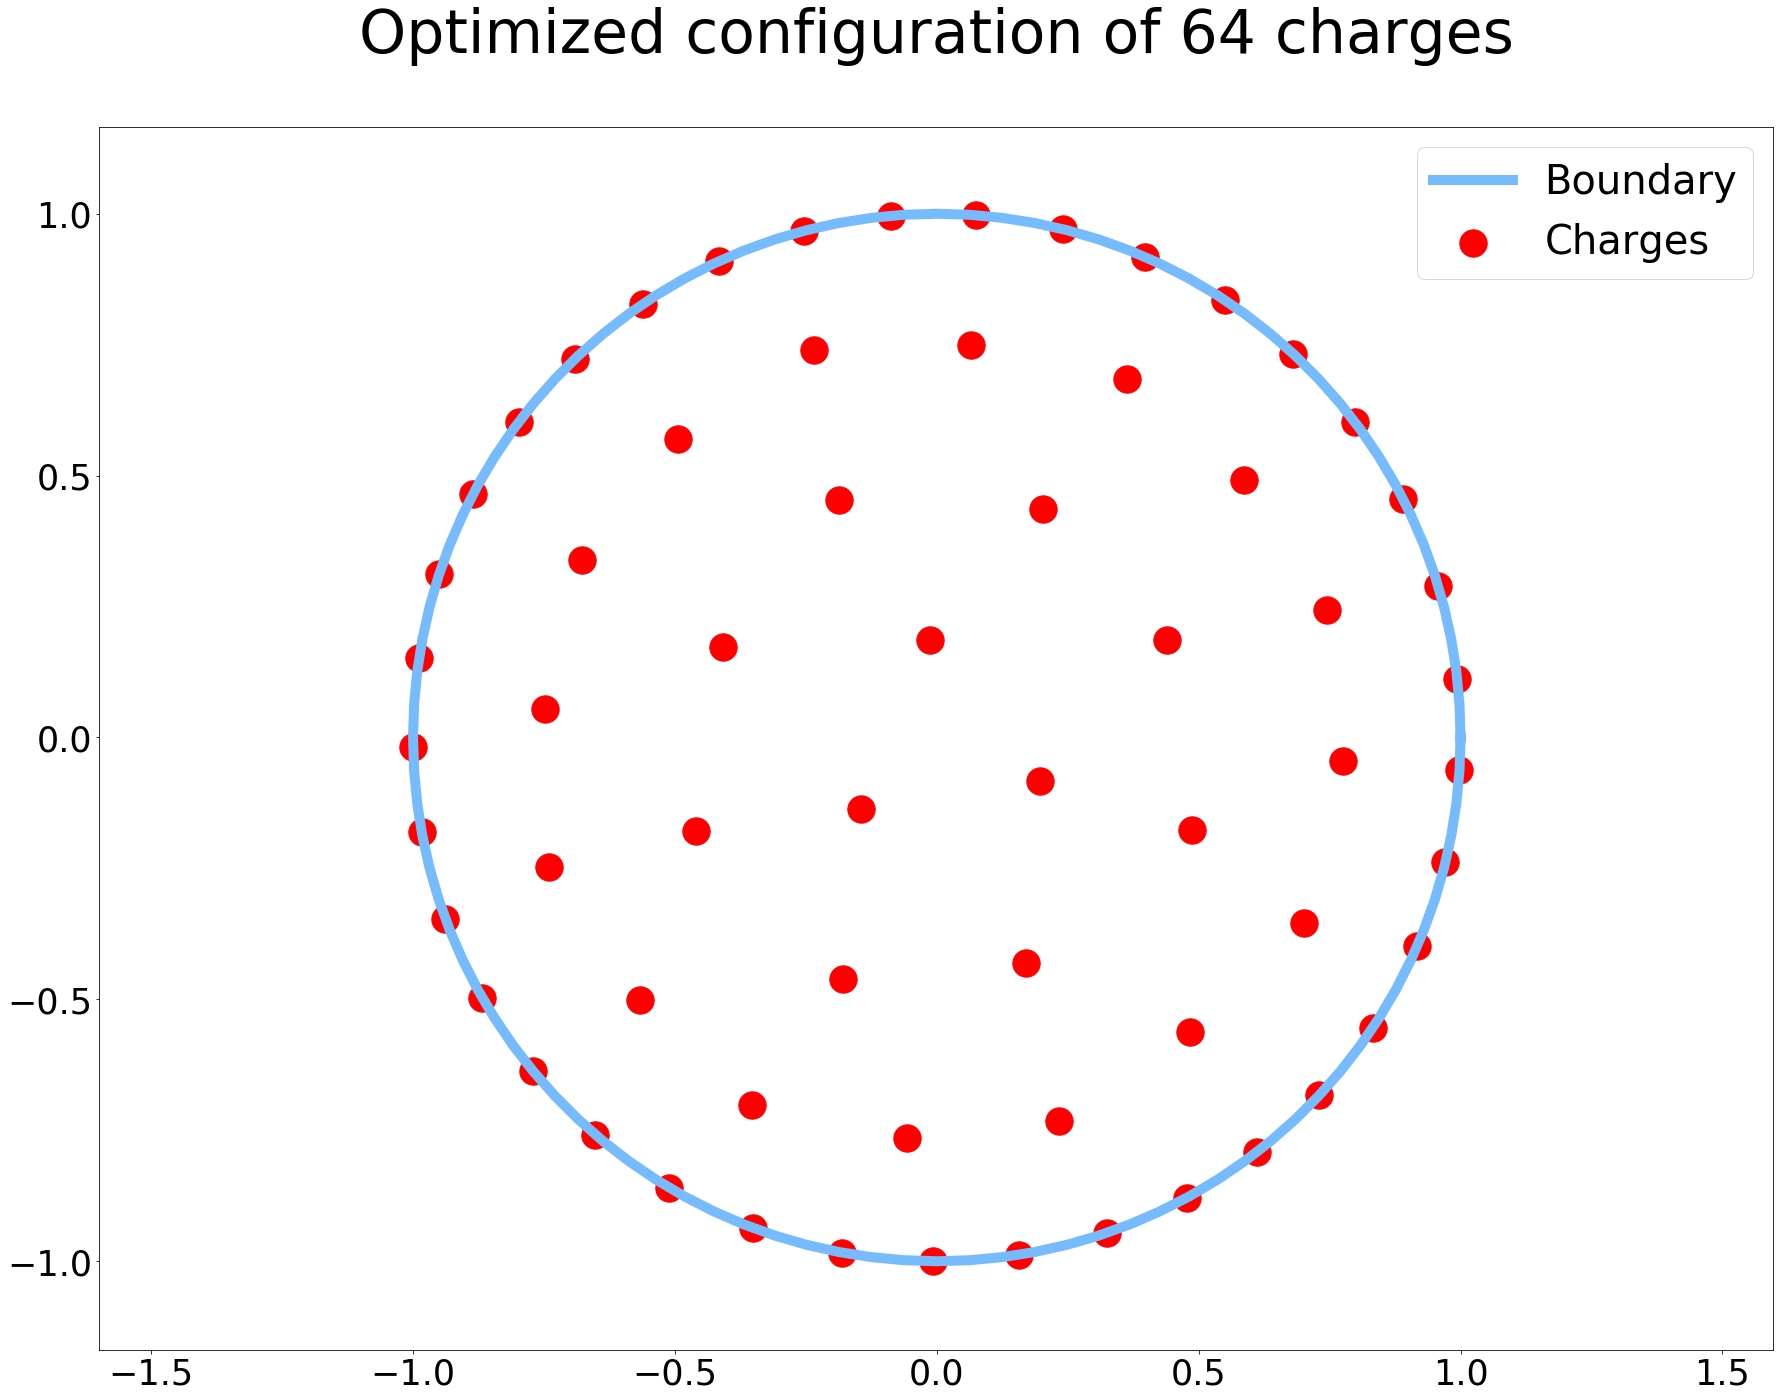

TypeError: save_energies() takes 1 positional argument but 2 were given

In [43]:
an2 = Annealer(64, 1, 10**-5, 0.5, 50, 0.01)
print(an2)
an2.plot_charges()
an2.freeze()
an2.save_plot('CH64C5MCS50')
an2.save_energies('energy_CH64C5MCS500')

Energy of the system: 332.06784180066074


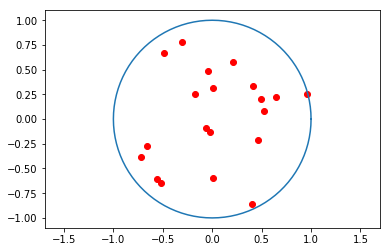

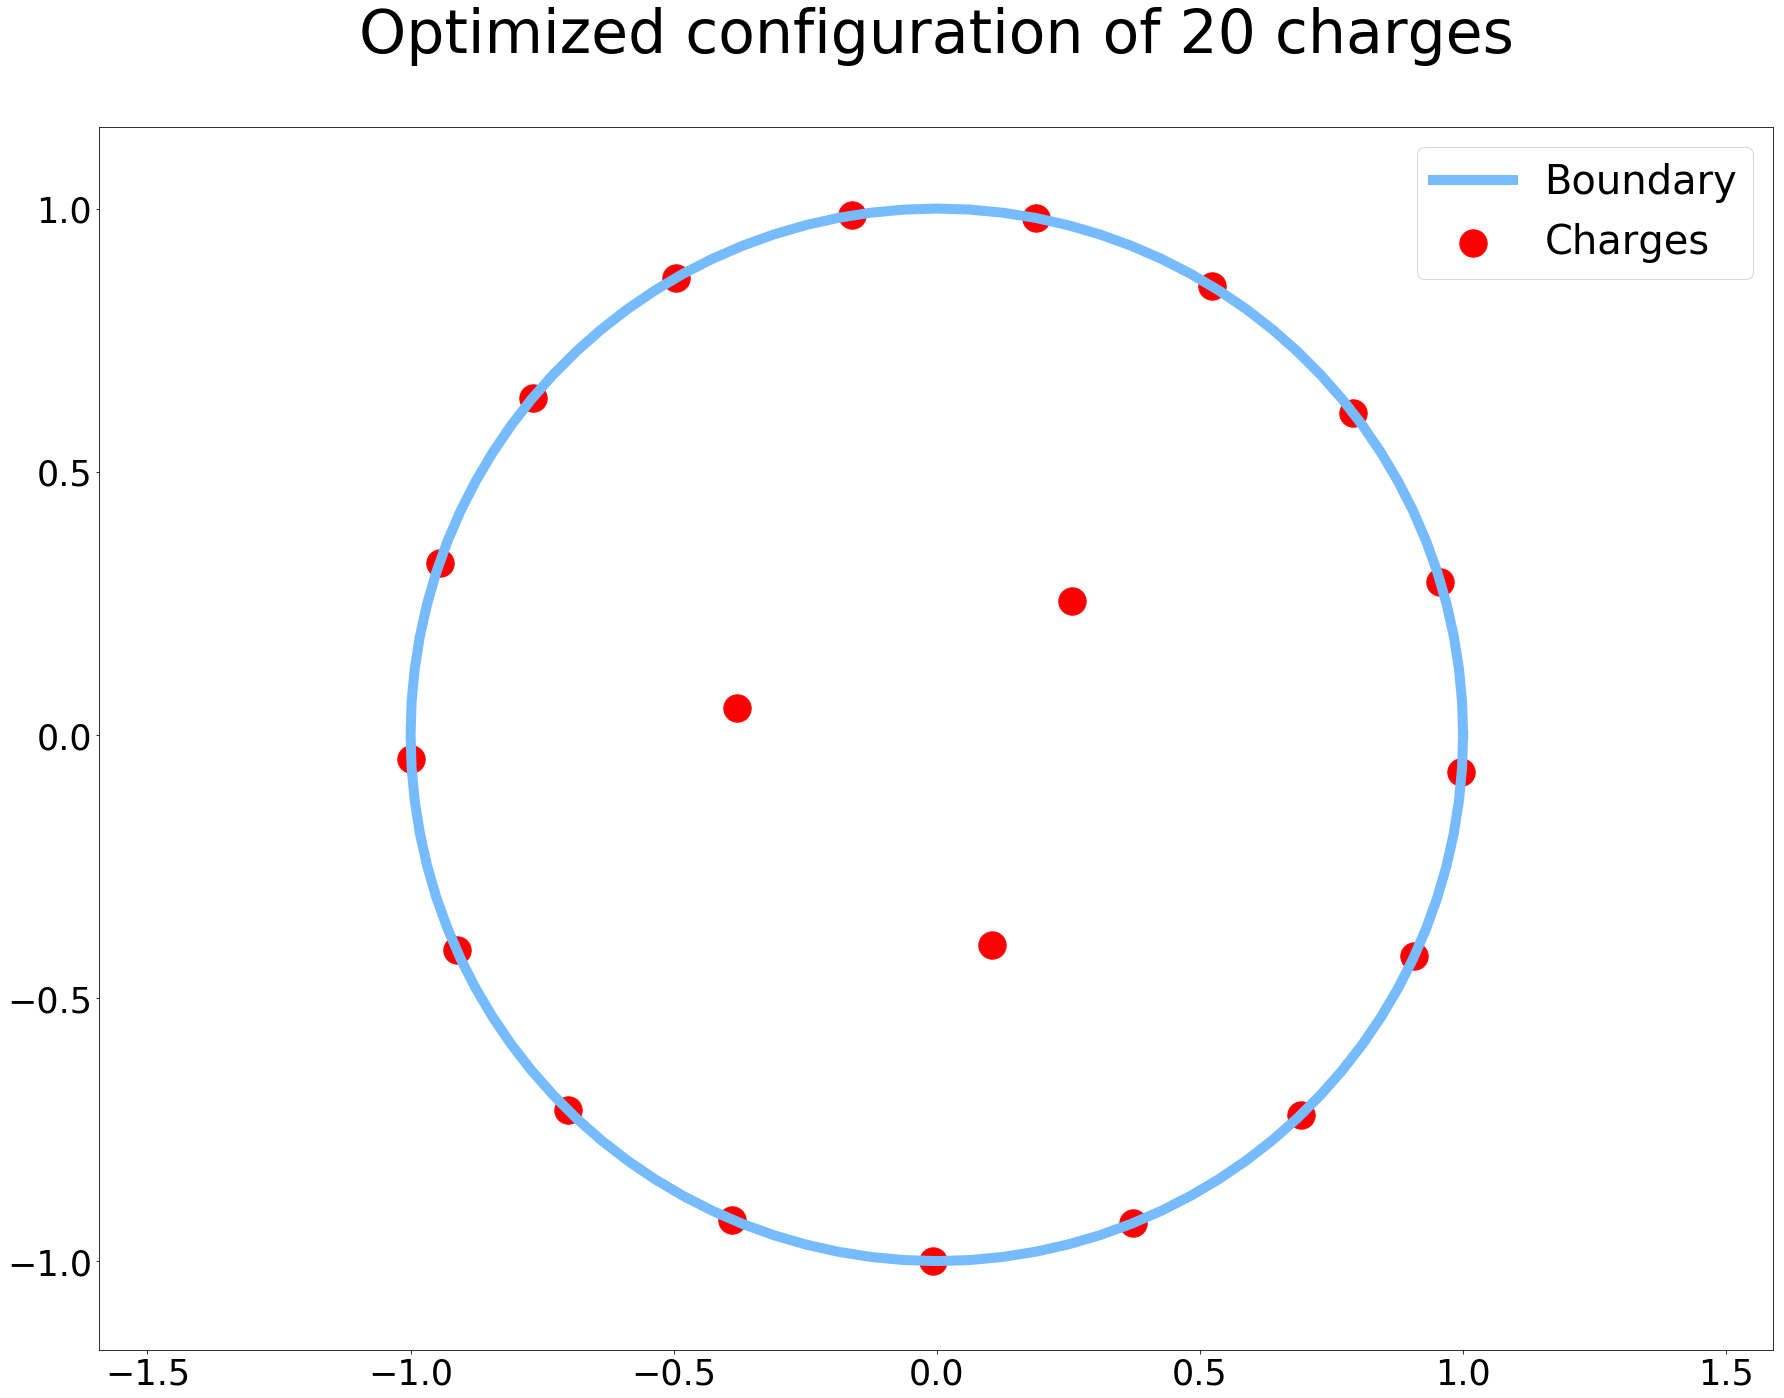

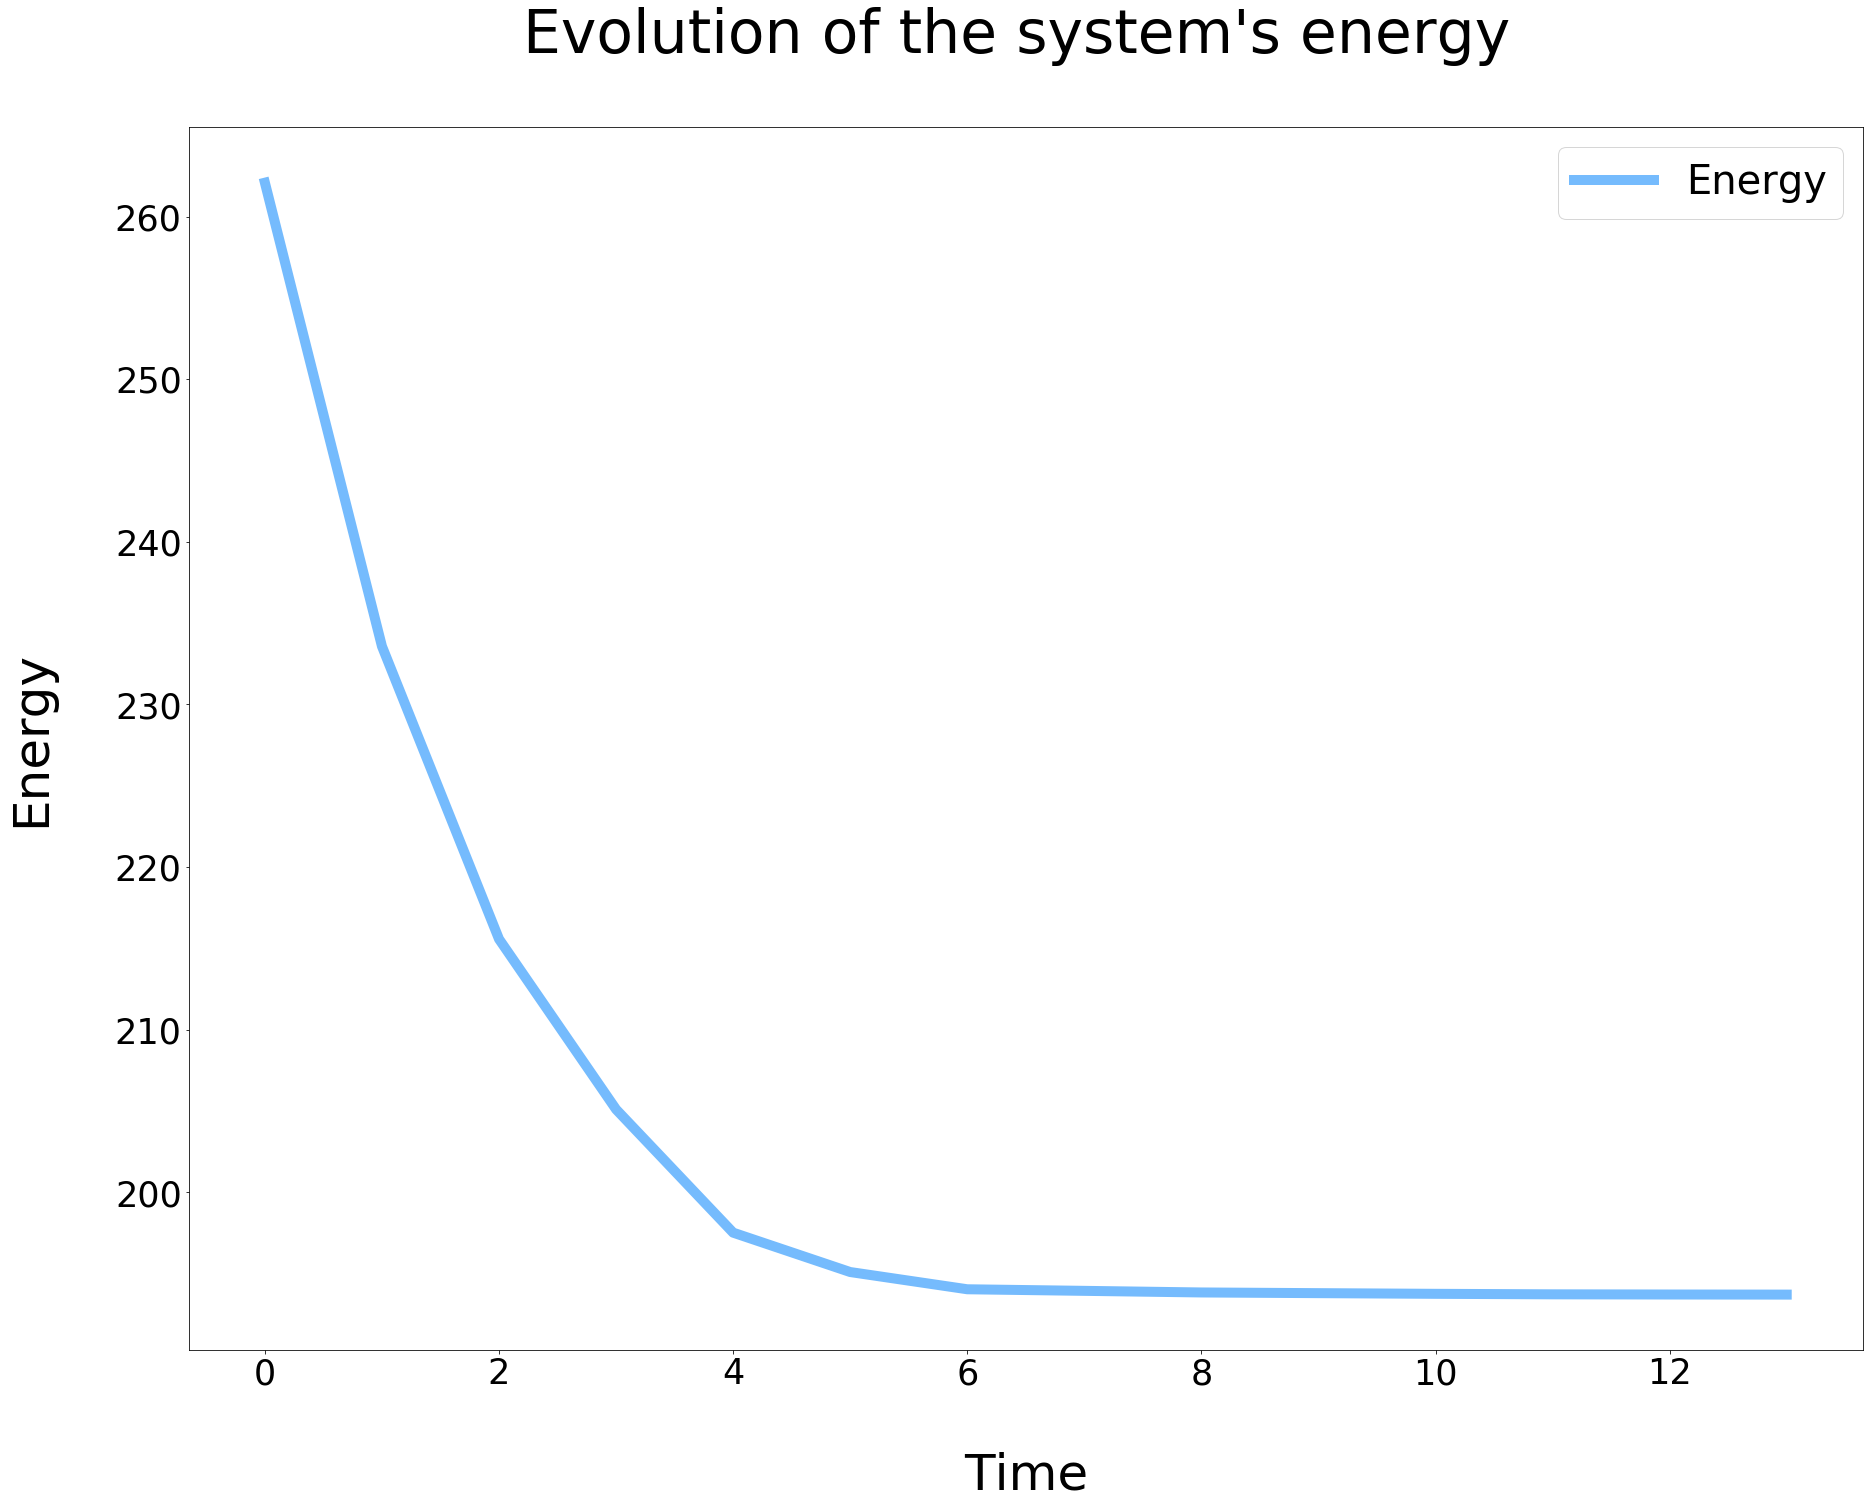

In [48]:
an3 = Annealer(20, 0.1, 10**-5, 0.5, 50, 0.01)
print(an3)
an3.plot_charges()
an3.freeze()
an3.save_plot('CH20C5MCS50')
an3.save_energies('energy_CH20C5MCS50')

In [50]:
def anneal_save(N, initial_temp, cooling_ratio, MCS):
  an_temp = Annealer(N, initial_temp, 10**-5, cooling_ratio, MCS, 0.01)
  print(an_temp)
  an_temp.plot_charges()
  an_temp.freeze()
  an_temp.save_plot(f'CH{N}C{cooling_ratio}MCS{MCS}')
  an_temp.save_energies('energy_CH{N}C{cooling_ratio}MCS{MCS}')
  return an_temp

Energy of the system: 176.0063480907423


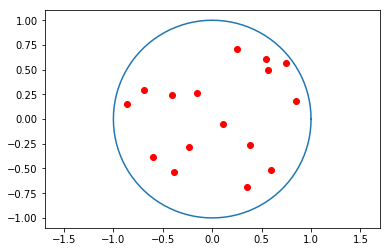

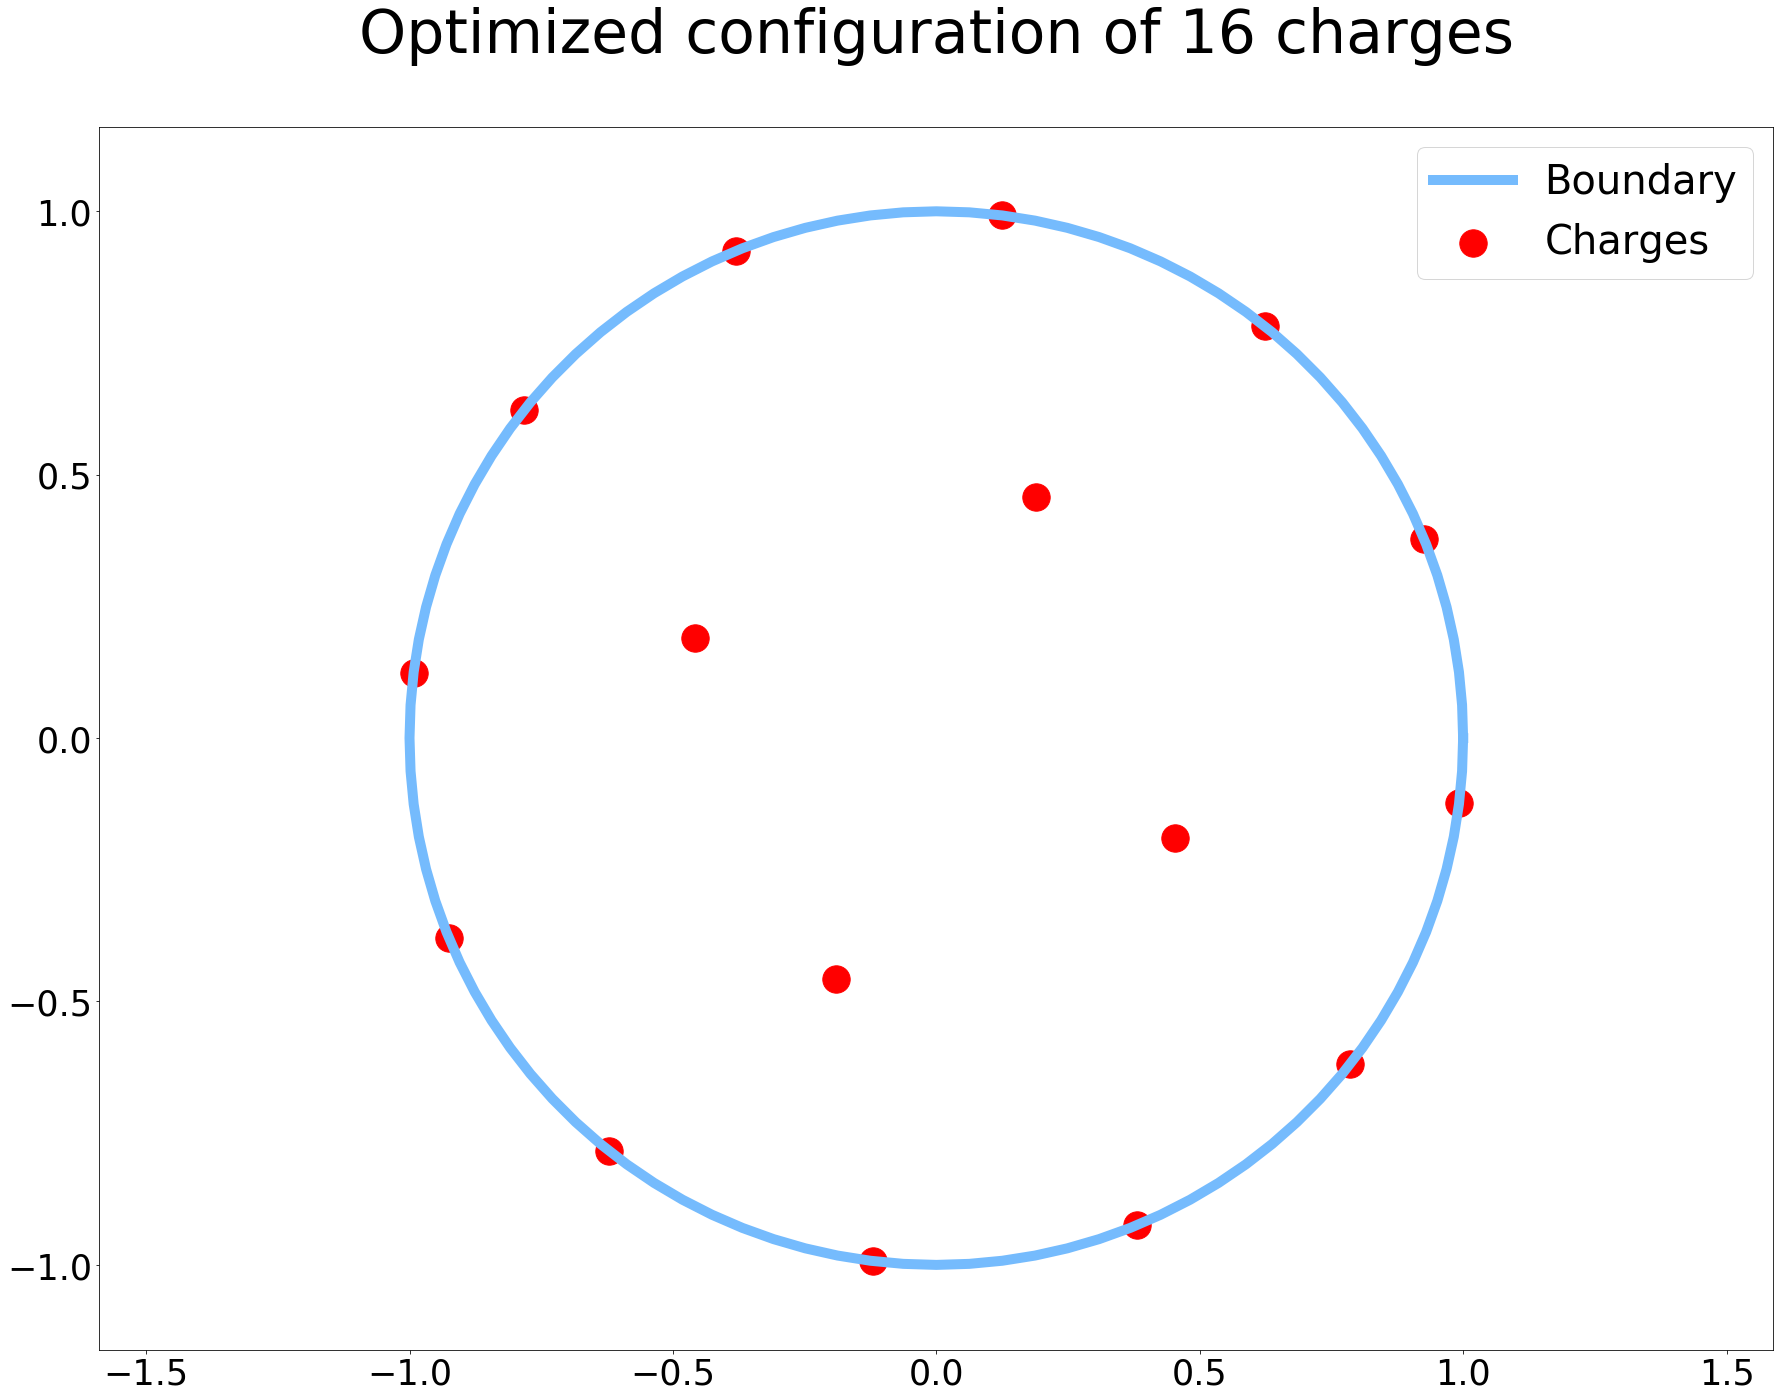

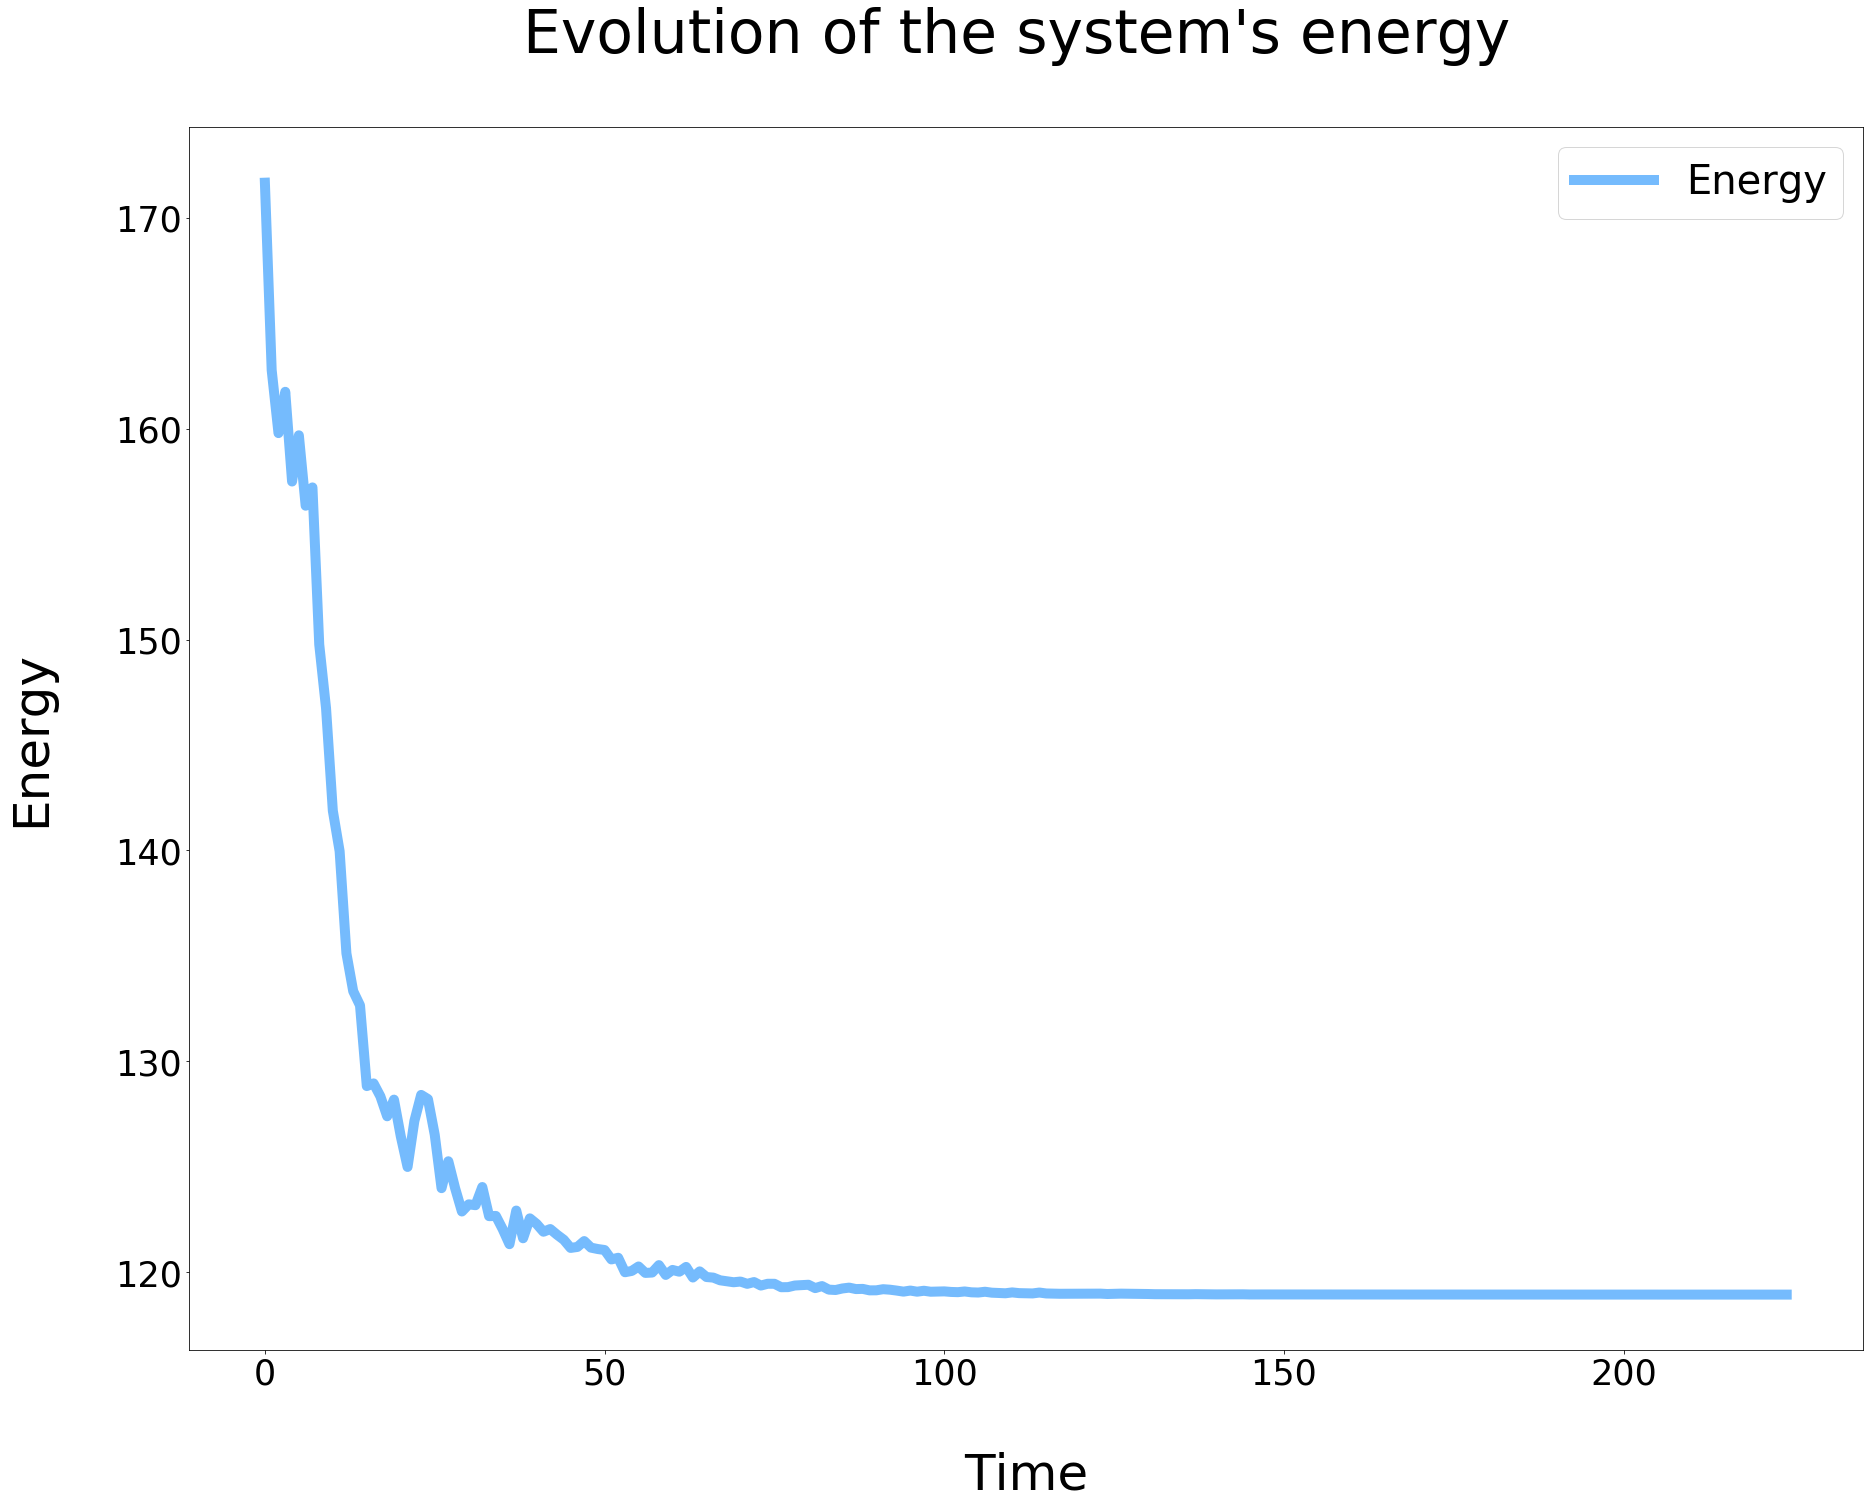

Energy of the system: 256.16780527181277


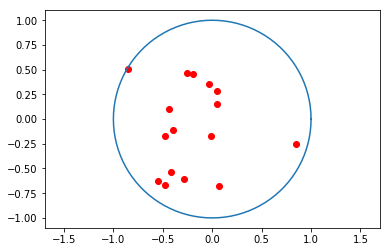

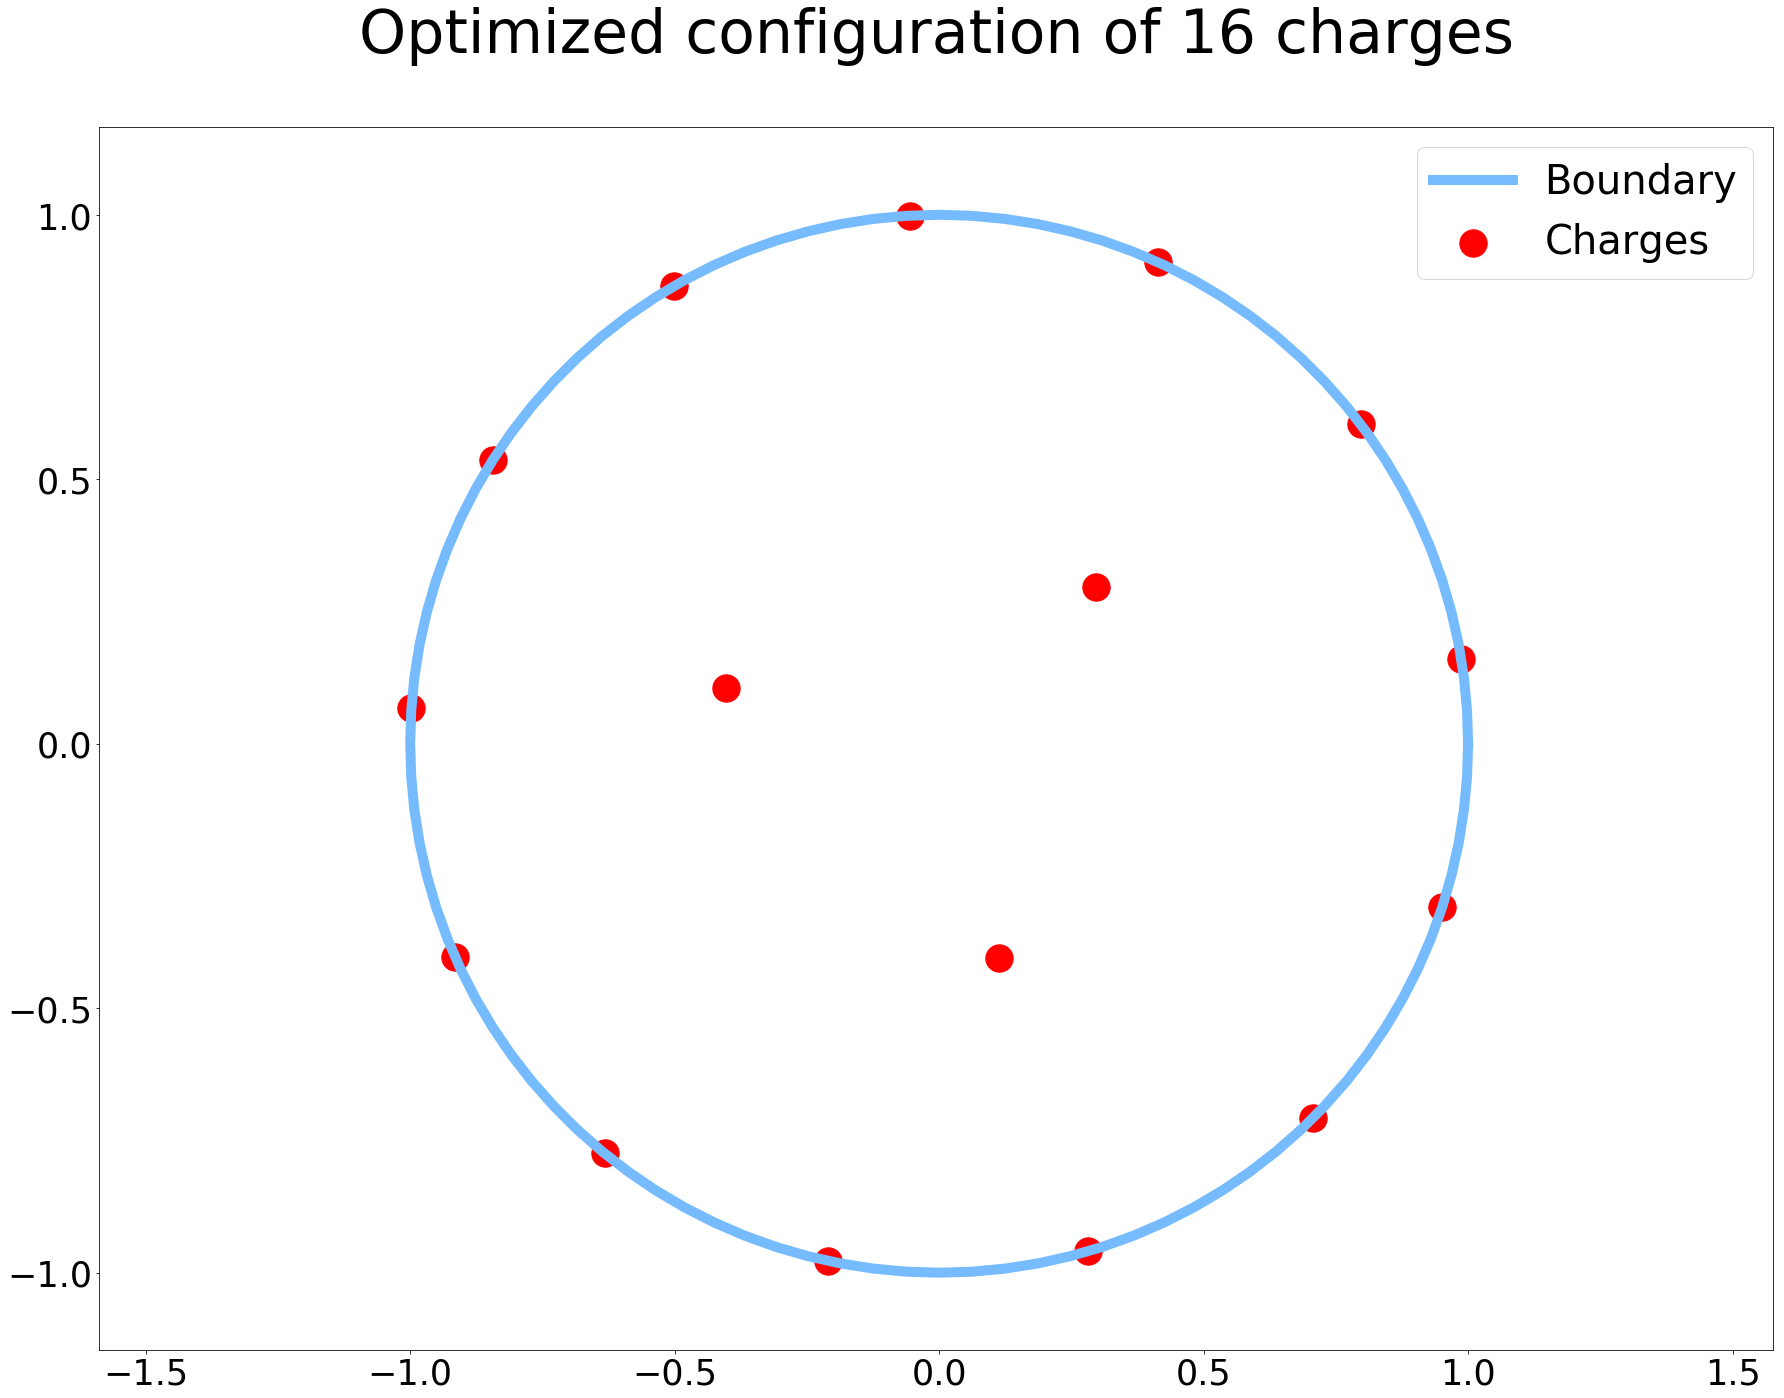

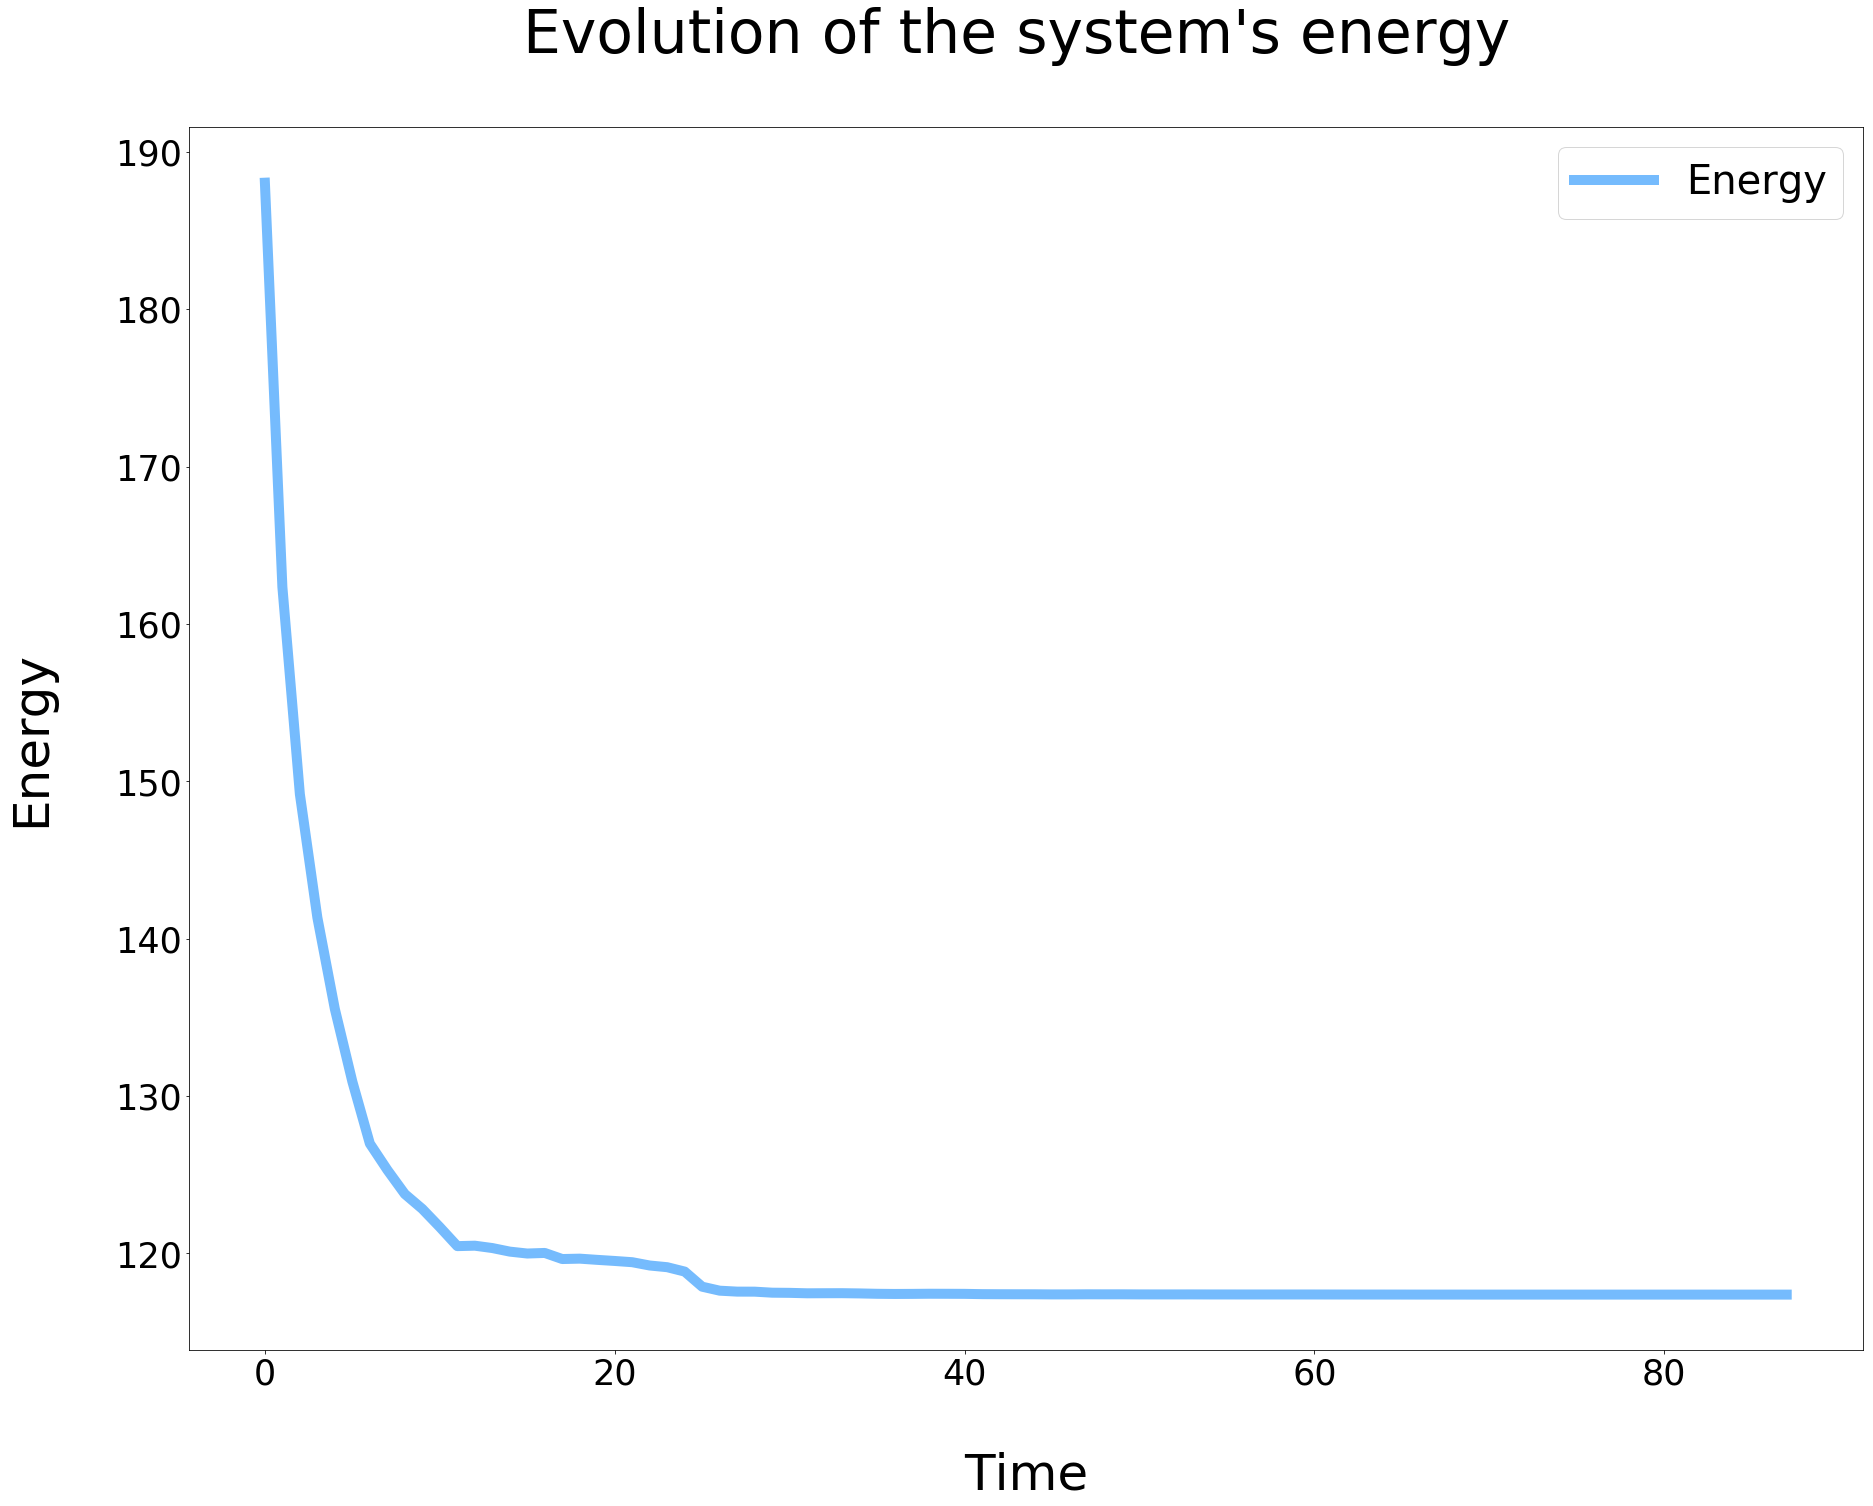

Energy of the system: 198.89879522778278


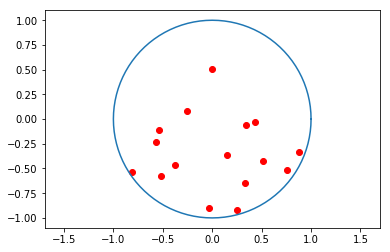

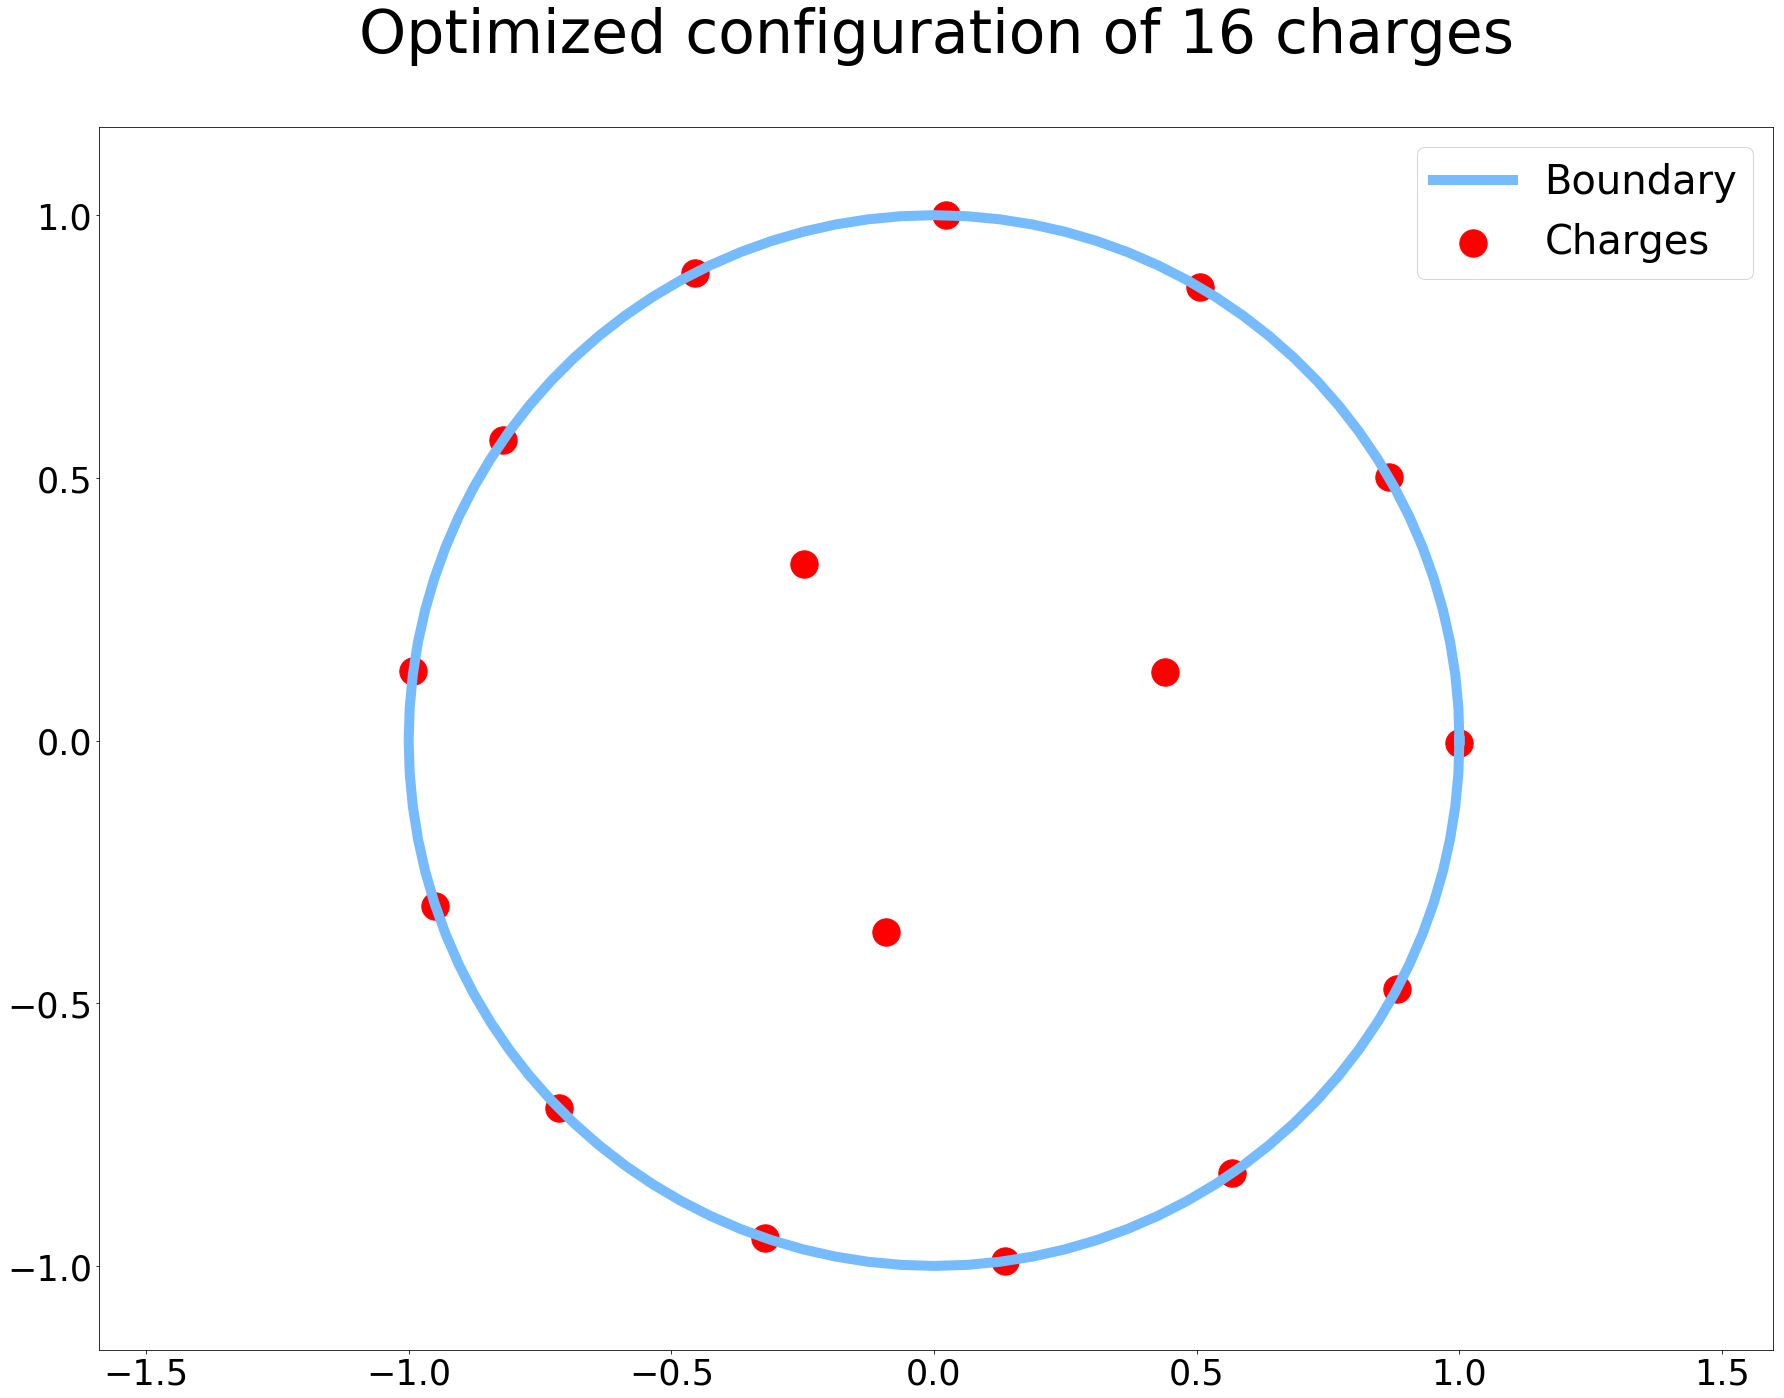

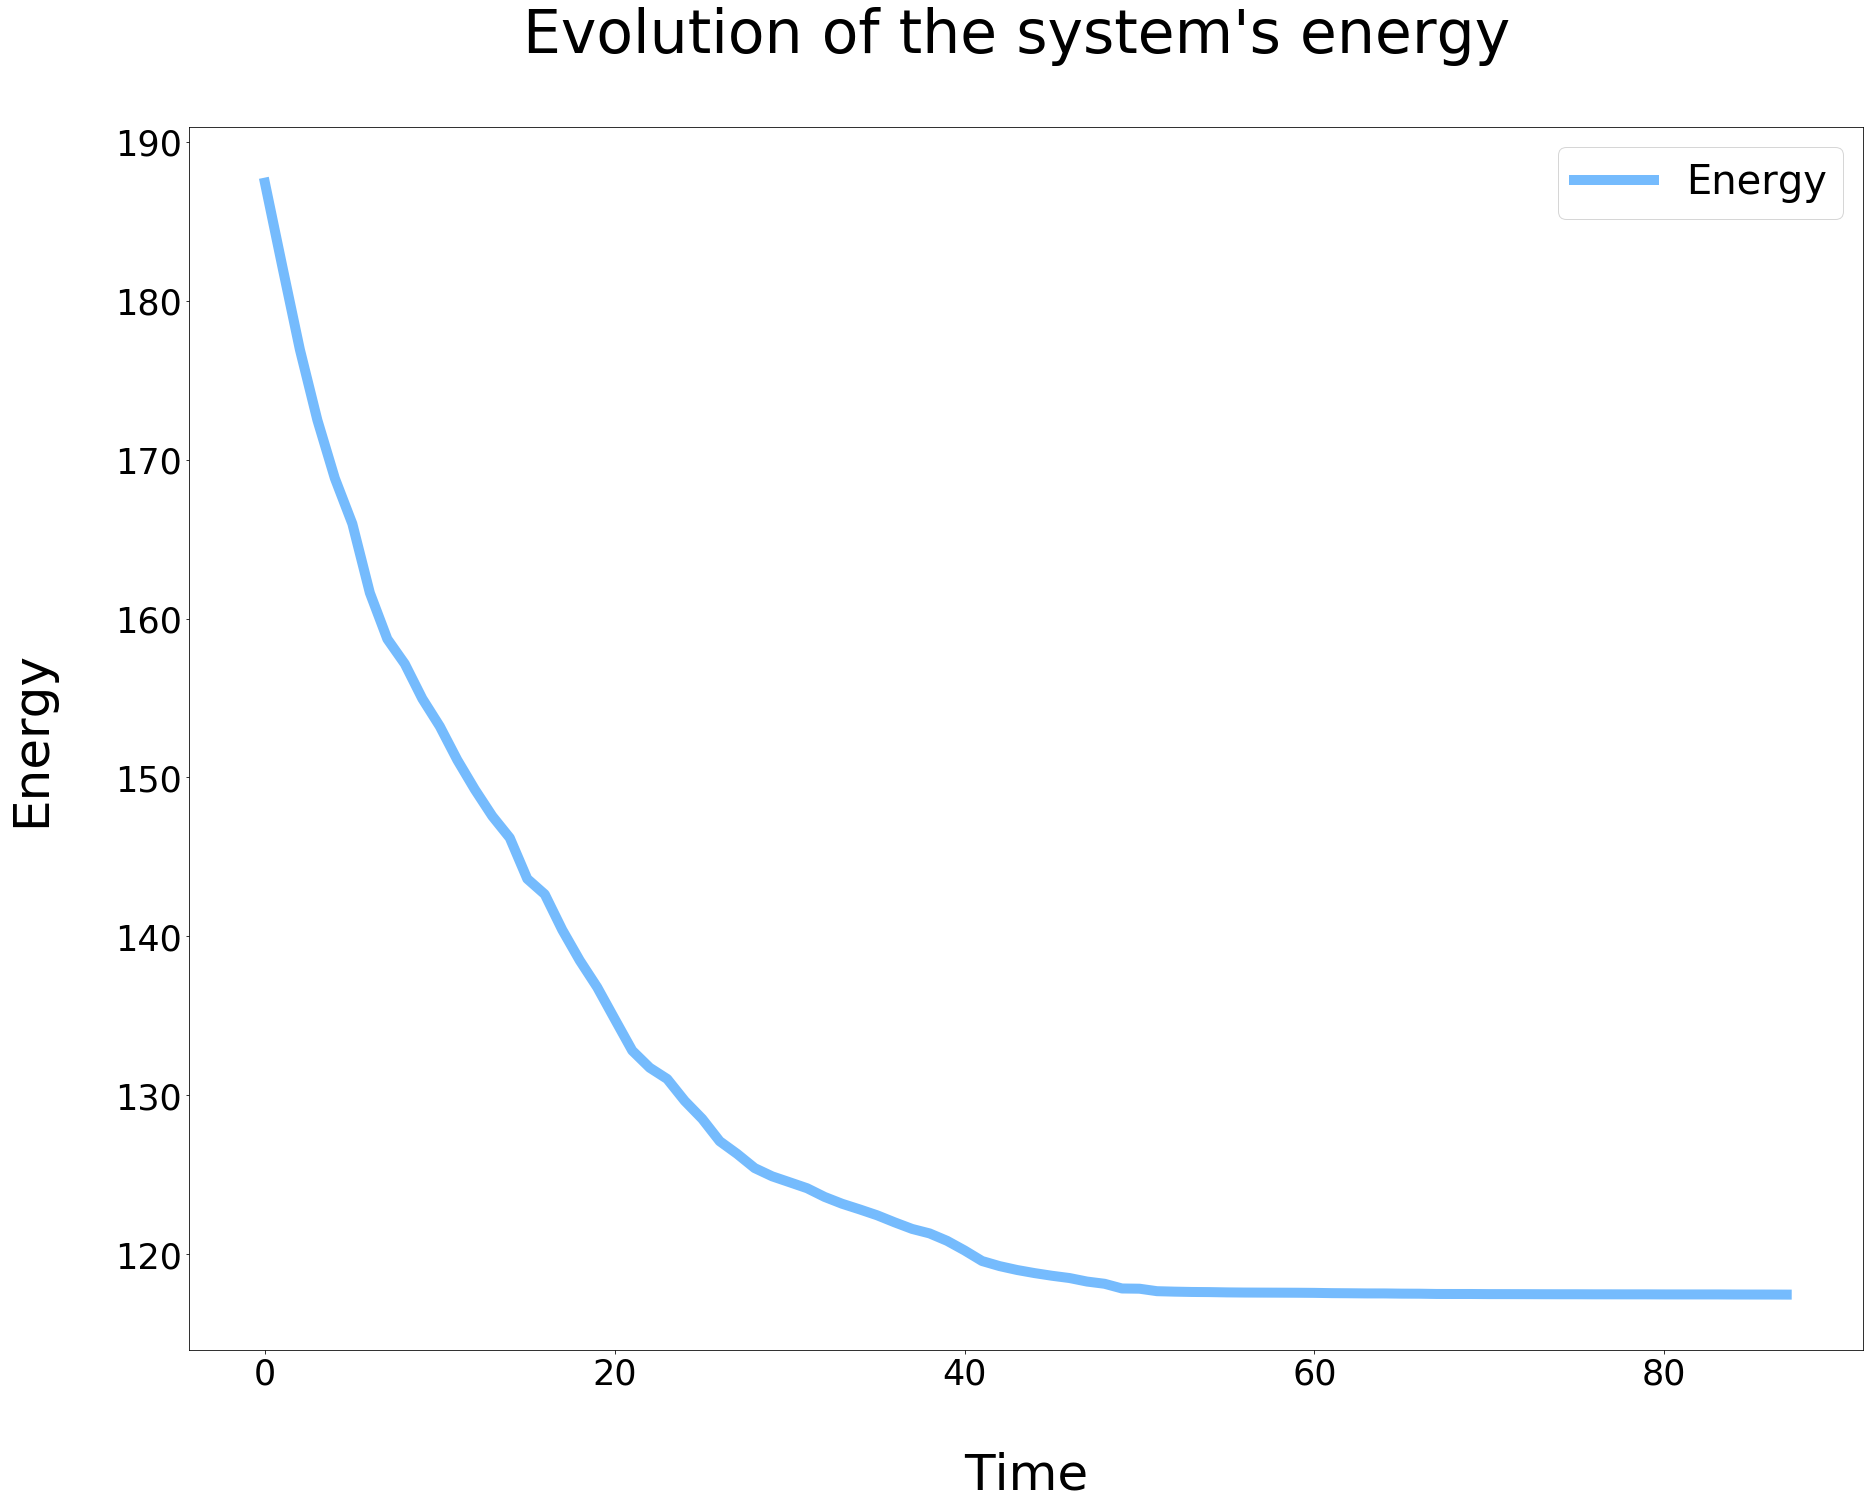

In [52]:
params = [[16, 1, 0.95, 50],
          [16, 0.1, 0.9, 50],
          [16, 0.1, 0.9, 10]
         ]
annealers = []
for i in params:
  annealers.append(anneal_save(*i))

In [53]:
for i in annealers:
  print(i)

Energy of the system: 118.94295127241995
Energy of the system: 117.37227780645456
Energy of the system: 117.46395879208026


Energy of the system: 55262.717951270395


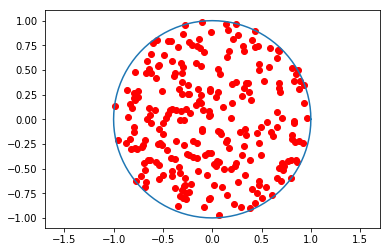

In [ ]:
an256 = anneal_save(256, 1, 0.5, 50)

In [ ]:
anneals_tot = []
for i in range(12,65):
  annealers.append(anneal_save(i, 1, 0.5, 25))